# Задание 1
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график<br>
- Рассчитать коэффициенты корреляции Пирсона и Спирмена<br>
- Построить модель линейной регрессии<br>
- Рассчитать коэффициент детерминации<br>
- Вывести график остатков

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

In [3]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


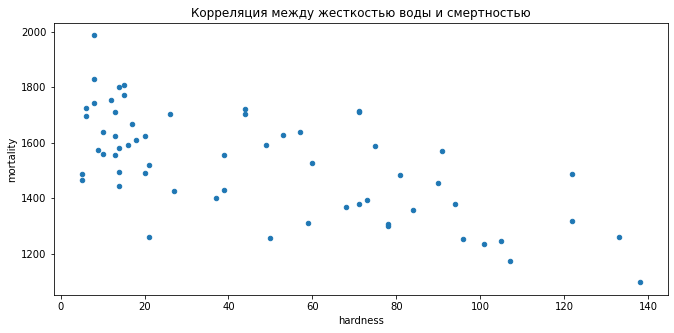

In [4]:
df.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Корреляция между жесткостью воды и смертностью')
plt.show()

Анализируя график корреляции между жесткостью воды и смерностью можно предположить, что есть слабая отрицательная зависимость между этими величинами. Посмотрим на коэффициенты корреляции.

Рассчитаем коэффициент корреляции Пирсона.

In [5]:
x_sum = df['hardness'].sum()
print(x_sum)

2878


In [6]:
y_sum = df['mortality'].sum()
print(y_sum)

92973


In [7]:
xy = df[['hardness', 'mortality']].product(axis=1)
print(xy.head())

0    130935
1     28356
2      7330
3     25200
4     28962
dtype: int64


In [8]:
xy_sum = xy.sum()
print(xy_sum)

4105604


In [9]:
x_square = df['hardness'] ** 2
print(x_square.head())

0    11025
1      289
2       25
3      196
4      324
Name: hardness, dtype: int64


In [10]:
x_square_sum = x_square.sum()
print(x_square_sum)

222854


In [11]:
y_square = df['mortality'] ** 2
print(y_square.head())

0    1555009
1    2782224
2    2149156
3    3240000
4    2588881
Name: mortality, dtype: int64


In [12]:
y_square_sum = y_square.sum()
print(y_square_sum)

143817743


In [13]:
n = 61

In [14]:
r = ((n * xy_sum) - (x_sum * y_sum)) / ((((n * x_square_sum) - (x_sum ** 2)) * ((n * y_square_sum) - (y_sum ** 2))) ** (0.5))
print(r)

-0.6548486232042465


In [15]:
# проверим себя
df.corr(method='pearson')

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.077133,0.123075
mortality,0.077133,1.000000,-0.654849
hardness,0.123075,-0.654849,1.000000


Полученное значение коэффициента корреляции Пирсона говорит о наличии умеренной отрицательной связи.

Рассчитаем коэффициент корреляции Спирмена.<br>
Сначала присвоим ранги. Для одинаковых значений ранг будет средним по промежутку, это упрощает вычисления, но дает огрубленные значения коэффициента.

In [16]:
df['hardness_rank'] = df['hardness'].rank(method='average')
df.head()

,Unnamed: 0,location,town,mortality,hardness,hardness_rank
0,1,South,Bath,1247,105,56.0
1,2,North,Birkenhead,1668,17,22.0
2,3,South,Birmingham,1466,5,1.5
3,4,North,Blackburn,1800,14,16.5
4,5,North,Blackpool,1609,18,23.0


In [17]:
df['mortality_rank'] = df['mortality'].rank(method='average')
df.head()

,Unnamed: 0,location,town,mortality,hardness,hardness_rank,mortality_rank
0,1,South,Bath,1247,105,56.0,4.0
1,2,North,Birkenhead,1668,17,22.0,46.0
2,3,South,Birmingham,1466,5,1.5,23.0
3,4,North,Blackburn,1800,14,16.5,58.0
4,5,North,Blackpool,1609,18,23.0,40.0


In [18]:
rank_diff = df['hardness_rank'] - df['mortality_rank']
rank_diff.head()

0    52.0
1   -24.0
2   -21.5
3   -41.5
4   -17.0
dtype: float64

In [19]:
rank_diff_square = rank_diff ** 2
rank_diff_square.head()

0    2704.00
1     576.00
2     462.25
3    1722.25
4     289.00
dtype: float64

In [20]:
rank_diff_square_sum = rank_diff_square.sum()
print(rank_diff_square_sum)

61681.0


In [21]:
rho = 1 - ((6 * rank_diff_square_sum)/(n * (n ** 2 - 1)))
print(rho)

-0.6309095716552089


In [22]:
# проверим себя
df.corr(method='spearman')

,Unnamed: 0,mortality,hardness,hardness_rank,mortality_rank
Unnamed: 0,1.000000,0.063011,0.112263,0.112263,0.063011
mortality,0.063011,1.000000,-0.631665,-0.631665,1.000000
hardness,0.112263,-0.631665,1.000000,1.000000,-0.631665
hardness_rank,0.112263,-0.631665,1.000000,1.000000,-0.631665
mortality_rank,0.063011,1.000000,-0.631665,-0.631665,1.000000


Получаем схожее, хотя и не точно такое же значение. Возможно, различия связаны с тем, что у нас есть ряд наблюдений с одинаковыми значениями, и мы им присваивали среднее из рангов вместо корректировки формулы расчета коэффициента.

Коэффициент Спирмена также указывает на умеренную отрицательную зависимость.

Построим линейную регрессию.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
x = df[['hardness']]
y = df['mortality']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [28]:
model.coef_

array([-3.0493441])

In [29]:
model.intercept_

1679.9264716307484

То есть, наше уравнение регрессии имеет примерно следующий вид: 'y = 1679.93 - 3.05x'.

In [40]:
y_pred_test = model.predict(x_test)
y_pred_test

array([1631.13696606, 1597.59418098, 1463.42304067, 1634.18631016,
       1643.33434245, 1664.67975114, 1274.3637066 , 1432.92959969,
       1661.63040704, 1655.53171885, 1625.03827787, 1457.32435248,
       1600.64352508, 1371.94271773, 1500.01516985, 1637.23565426,
       1451.22566428, 1442.07763199, 1387.18943822])

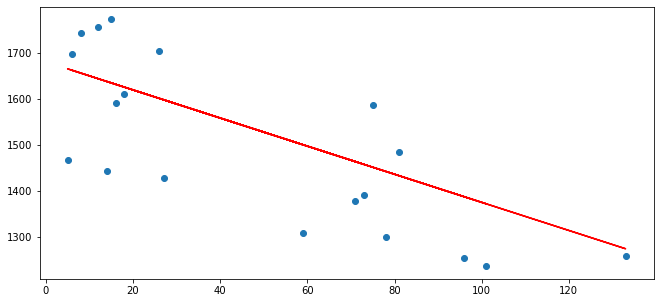

In [41]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, c = 'r')

Линейная регрессия тоже демонстрирует нам отрицательную зависимость смертности от жесткости воды.

Рассчитаем коэффициент детерминации.

In [36]:
model.score(x_test, y_test)

0.5305131271695874

Значение коэффициента детерминации намекает, что модель может быть не безнадежна, но над ее уточнением хорошо бы поработать :)

Выведем график остатков.

In [42]:
y_pred_train = model.predict(x_train)

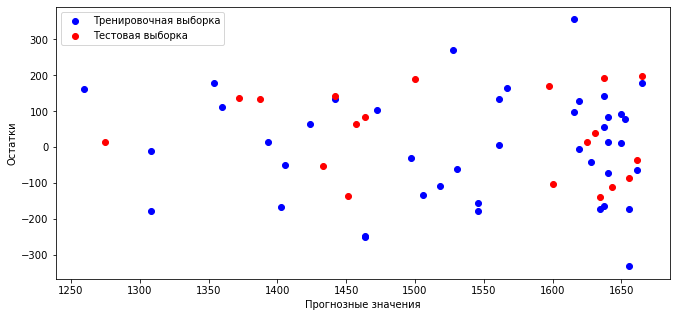

In [45]:
plt.scatter(y_pred_train,  y_pred_train - y_train,
            c='blue', label='Тренировочная выборка')
plt.scatter(y_pred_test,  y_pred_test - y_test,
            c='red', label='Тестовая выборка')
plt.xlabel('Прогнозные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')

Визуально кажется, что остатки распределены случайно. Проверим гистограмму.

In [47]:
y_pred = model.predict(x)

(array([ 1.,  2., 10.,  7.,  8., 10., 13.,  8.,  1.,  1.]),
 array([-331.46828115, -262.73242848, -193.99657581, -125.26072314,
         -56.52487046,   12.21098221,   80.94683488,  149.68268755,
         218.41854023,  287.1543929 ,  355.89024557]),
 <BarContainer object of 10 artists>)

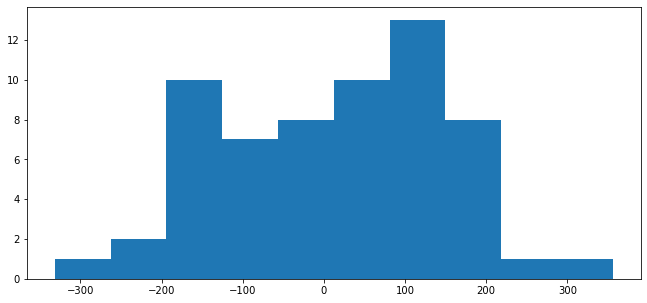

In [49]:
plt.hist((y_pred - y))

Визуально не похоже, что ошибки распределены нормально.

# Задание 2
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

# Южные города

In [54]:
df_south = df.loc[df.location == 'South']
df_south.head()

,Unnamed: 0,location,town,mortality,hardness,hardness_rank,mortality_rank
0,1,South,Bath,1247,105,56.0,4.0
2,3,South,Birmingham,1466,5,1.5,23.0
7,8,South,Bournemouth,1299,78,47.5,9.0
9,10,South,Brighton,1359,84,50.0,13.0
10,11,South,Bristol,1392,73,45.0,17.0


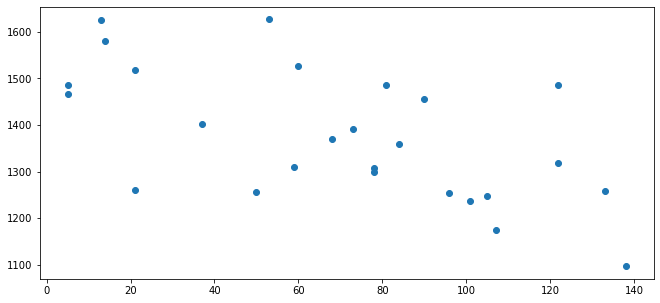

In [85]:
plt.scatter(df_south.hardness, df_south.mortality)

In [65]:
df_south.count()

Unnamed: 0        26
location          26
town              26
mortality         26
hardness          26
hardness_rank     26
mortality_rank    26
dtype: int64

Рассчитаем коэффициенты корреляции Пирсона и Спирмена.

In [57]:
df_south.corr(method='pearson')

,Unnamed: 0,mortality,hardness,hardness_rank,mortality_rank
Unnamed: 0,1.000000,0.396333,-0.005337,-0.005843,0.434547
mortality,0.396333,1.000000,-0.602153,-0.586149,0.980288
hardness,-0.005337,-0.602153,1.000000,0.956096,-0.583122
hardness_rank,-0.005843,-0.586149,0.956096,1.000000,-0.581393
mortality_rank,0.434547,0.980288,-0.583122,-0.581393,1.000000


In [58]:
df_south.corr(method='spearman')

,Unnamed: 0,mortality,hardness,hardness_rank,mortality_rank
Unnamed: 0,1.000000,0.354591,-0.013685,-0.013685,0.354591
mortality,0.354591,1.000000,-0.595723,-0.595723,1.000000
hardness,-0.013685,-0.595723,1.000000,1.000000,-0.595723
hardness_rank,-0.013685,-0.595723,1.000000,1.000000,-0.595723
mortality_rank,0.354591,1.000000,-0.595723,-0.595723,1.000000


Оба коэффициента равны примерно -0,6, что также говорит об отрицательной связи средней силы.

In [59]:
x = df_south[['hardness']]
y = df_south['mortality']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [61]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [62]:
model.coef_

array([-2.25813343])

In [63]:
model.intercept_

1537.3866436225371

Уравнение регрессии имеет вид: 'y = 1537.3866 - 2.2581x'.

Рассчитаем коэффициент детерминации.

In [64]:
model.score(x_test, y_test)

0.1474538393955951

Коэффициент детерминации стал существенно ниже. Одна из основных причин, скорее всего - малое количество наблюдений в выборе (всего 26).

Выведем график остатков.

In [68]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

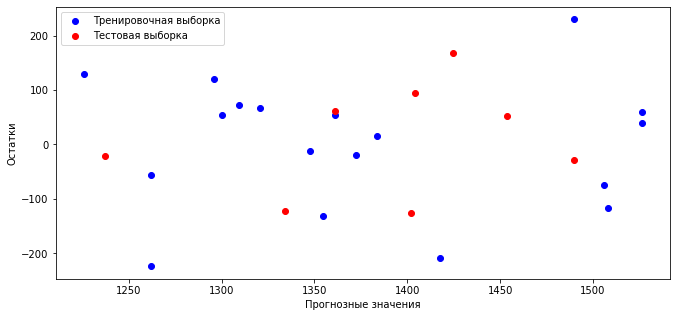

In [69]:
plt.scatter(y_pred_train,  y_pred_train - y_train,
            c='blue', label='Тренировочная выборка')
plt.scatter(y_pred_test,  y_pred_test - y_test,
            c='red', label='Тестовая выборка')
plt.xlabel('Прогнозные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')

Визуально выглядит так, как будто остатки распределены случайно.

In [70]:
y_pred = model.predict(x)

(array([2., 0., 4., 2., 4., 2., 7., 3., 1., 1.]),
 array([-224.10563429, -178.69848669, -133.29133909,  -87.8841915 ,
         -42.4770439 ,    2.9301037 ,   48.3372513 ,   93.74439889,
         139.15154649,  184.55869409,  229.96584169]),
 <BarContainer object of 10 artists>)

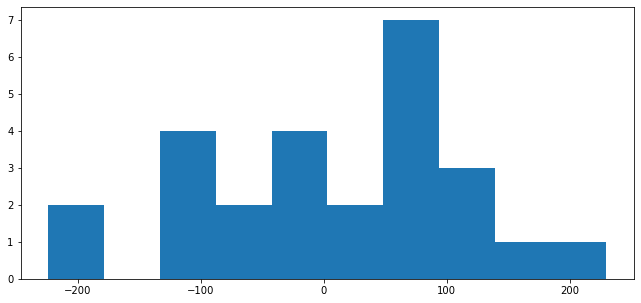

In [71]:
plt.hist((y_pred - y))

Визуально не похоже на нормальное распределение.

# Северные города

In [73]:
df_north = df.loc[df.location == 'North']
df_north.head()

,Unnamed: 0,location,town,mortality,hardness,hardness_rank,mortality_rank
1,2,North,Birkenhead,1668,17,22.0,46.0
3,4,North,Blackburn,1800,14,16.5,58.0
4,5,North,Blackpool,1609,18,23.0,40.0
5,6,North,Bolton,1558,10,9.5,33.0
6,7,North,Bootle,1807,15,19.5,59.0


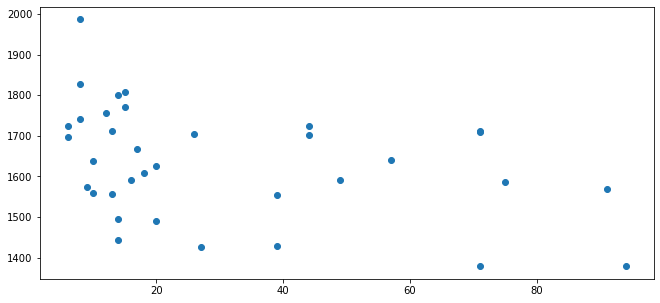

In [86]:
plt.scatter(df_north.hardness, df_north.mortality)

In [74]:
df_north.count()

Unnamed: 0        35
location          35
town              35
mortality         35
hardness          35
hardness_rank     35
mortality_rank    35
dtype: int64

Рассчитаем коэффициенты корреляции Пирсона и Спирмена.

In [76]:
df_north.corr(method='pearson')

,Unnamed: 0,mortality,hardness,hardness_rank,mortality_rank
Unnamed: 0,1.000000,-0.103548,0.309195,0.240279,-0.134127
mortality,-0.103548,1.000000,-0.368598,-0.429294,0.973358
hardness,0.309195,-0.368598,1.000000,0.952352,-0.349643
hardness_rank,0.240279,-0.429294,0.952352,1.000000,-0.401969
mortality_rank,-0.134127,0.973358,-0.349643,-0.401969,1.000000


In [77]:
df_north.corr(method='spearman')

,Unnamed: 0,mortality,hardness,hardness_rank,mortality_rank
Unnamed: 0,1.000000,-0.109812,0.222145,0.222145,-0.109812
mortality,-0.109812,1.000000,-0.404208,-0.404208,1.000000
hardness,0.222145,-0.404208,1.000000,1.000000,-0.404208
hardness_rank,0.222145,-0.404208,1.000000,1.000000,-0.404208
mortality_rank,-0.109812,1.000000,-0.404208,-0.404208,1.000000


Для северных городов корреляция слабая.

In [78]:
x = df_north[['hardness']]
y = df_north['mortality']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [80]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [81]:
model.coef_

array([-2.19897305])

In [82]:
model.intercept_

1707.8894952942032

Уравнение регрессии имеет вид: 'y = 1707.8895 - 2.1990x'.

Рассчитаем коэффициент детерминации.

In [83]:
model.score(x_test, y_test)

-0.0027967328921720824

Коэффициент детерминации стал отрицательным, что говорит о крайне низком качестве модели. Вероятно, одна из причин - малое количество наблюдений.

Выведем график остатков.

In [87]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

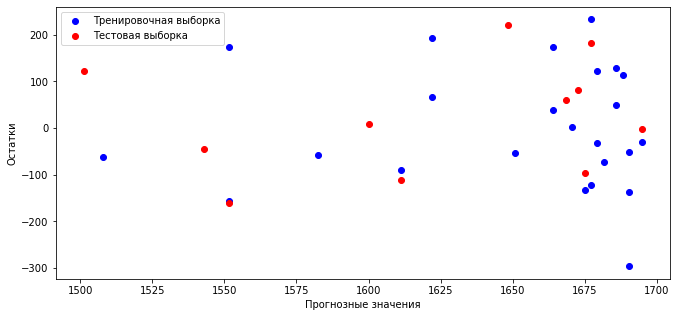

In [88]:
plt.scatter(y_pred_train,  y_pred_train - y_train,
            c='blue', label='Тренировочная выборка')
plt.scatter(y_pred_test,  y_pred_test - y_test,
            c='red', label='Тестовая выборка')
plt.xlabel('Прогнозные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')

Визуально не похоже, что остатки распределены случайно.

In [89]:
y_pred = model.predict(x)

(array([1., 0., 2., 6., 6., 5., 4., 4., 3., 4.]),
 array([-296.70228911, -243.72167294, -190.74105677, -137.7604406 ,
         -84.77982443,  -31.79920826,   21.18140791,   74.16202408,
         127.14264025,  180.12325642,  233.10387259]),
 <BarContainer object of 10 artists>)

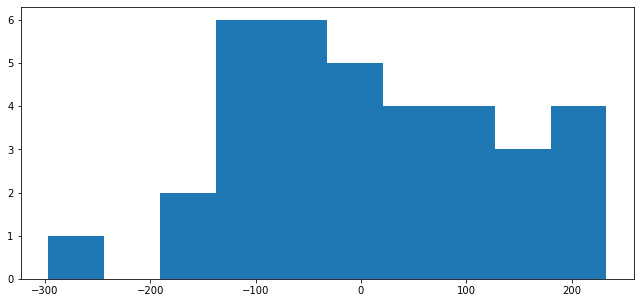

In [90]:
plt.hist((y_pred - y))

По гистограмме визуально также не похоже, что остатки распределены нормально.

Тому факту, что зависимость не подтверждается на более маленькой выборке северных городов, сложно дать содержательную интерпретацию, поскольку размер подвыборок южных и северных городов очень маленький. Вся выборка (61 наблюдение) тоже довольно мала, и даже анализ по всей выборке может вызывать сомнения.